<a href="https://colab.research.google.com/github/Akasonal/Fake-news-classifier/blob/main/Fake_News_classifier_using_Lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
import pandas as pd
import numpy as np

In [18]:
df=pd.read_csv("train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [19]:
df.shape  #number of rows and columns present in dataset

(20800, 5)

In [20]:
df.isnull().values.any()   #is there any null values present in dataset

True

In [21]:
df.isnull().sum()   #printing count of null value present in dataset

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [22]:
#dropping all the null values
df=df.dropna()

In [23]:

df.shape  # shape of dataset after removing null values

(18285, 5)

In [25]:

#resetting the index so that the index with eliminated null value will be removed and again it will take data in serial manner
df=df.reset_index(drop=True)
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [26]:
#splitting the dataset into dependent and independent variable
X=df.drop("label",axis=1)
Y=df["label"]
print(X.shape)
print(Y.shape)

(18285, 4)
(18285,)


In [27]:

X["title"][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

## Text Preprocessing

In [28]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [29]:

nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:

filtered_sent=[]
stemmer=PorterStemmer()
for i in range(0,len(X)):
  sent=re.sub(r"[^a-zA-Z]"," ",X["title"][i])  #removing all the alpha numeric word rather than english alphabet
  sent=sent.lower()        #converting all those word into lowercase english alphabet
  cleaned=sent.split()       #splitting the value into list of words
  cleaned=[stemmer.stem(word) for word in sent if not word in  set(stopwords.words('english')) if len(word)>2]
  cleaned="".join(cleaned)
  filtered_sent.append(cleaned)

In [32]:
filtered_sent

['hue e e  we n  even ee ce  leer unl jn chffez weee ',
 'flnn  hllr clnn  bg wn n cpu   brebr',
 'wh he ruh gh ge u fre',
 '   cvln klle n ngle u rrke hve been enfe',
 'rnn wn jle fr fcnl unpublhe r bu wn ne  eh fr uler',
 'jcke n  hllw wul lve rup f he bbe nrh kre ver lck f rn bhr  excluve ve    brebr',
 'ben  hn wn french cl pr  preenl nnn   he new rk e',
 ' bck chnnel pln fr ukrne n ru  cure f rup ce   he new rk e',
 'b  rgnzng fr cn prner wh r lnke  nvble   rup rup  gen',
 'bbc ce kech  rel huewve f   cue urge',
 'run reercher cver ecre nz lr be  reure huner  n he rcc  ph ',
 'u ffcl ee n lnk beween rup n ru',
 're  e  here re p gvernen rll n cl e  blg  fru n webe',
 'n jr legue ccer  rgenne fn  he n ucce   he new rk e',
 'well frg chef brupl ep wn   he new rk e',
 'nnu nr p      lln  relee everne rree  he k cce ppelne',
 'fb cle n n hllr ',
 'chuck    buzzfee  nl rup  plcl fvr    brebr',
 'nc lewnk  clnn ex cnl e fr  ercn cre r ',
 'rb rener  rup   enll unble    brebr',
 'brn pll

# Word Embedding


In [35]:
vocab_size=5000
encoded_doc=[one_hot(word,vocab_size) for word in filtered_sent]  #encoding data into one hot 
encoded_doc[0]


[4028, 2163, 2163, 4451, 4607, 4276, 3927, 3630, 4928, 267, 1518, 313, 4853]

In [42]:
#padding the data so that lenth of everydocument in corpus will be same
len_sent=20  #creating each docuumentr with the size of 20
encoded_pad_doc=pad_sequences(encoded_doc,maxlen=len_sent,padding="post")   
encoded_pad_doc[5]

array([4476, 4607,  831, 2426, 2573, 4232,   49, 1864, 2379,  858,  857,
       4760, 2707,   49, 2936, 2468, 3817, 2720, 1159,    0], dtype=int32)

In [45]:
#embedding of the data
dim=30
model=Sequential()
model.add(Embedding(vocab_size,dim,input_length=len_sent))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation="sigmoid"))
model.add(Dropout(0.3))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 30)            150000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 30)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               52400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
_________________________________________________________________
dropout_4 (Dropout)          (None, 1)                 0         
Total params: 202,501
Trainable params: 202,501
Non-trainable params: 0
________________________________________________

In [47]:
X_final=np.array(encoded_pad_doc)
Y_final=np.array(Y)

In [48]:
print(X_final.shape,Y_final.shape)

(18285, 20) (18285,)


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_final,Y_final,test_size=0.20,random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(14628, 20)
(14628,)
(3657, 20)
(3657,)


In [51]:
#fitting the model
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,shuffle=True,batch_size=65)

Epoch 1/10
226/226 [==============================] - 7s 30ms/step - loss: 2.1413 - accuracy: 0.8496 - val_loss: 0.3089 - val_accuracy: 0.9089
Epoch 2/10
226/226 [==============================] - 7s 29ms/step - loss: 2.0687 - accuracy: 0.8547 - val_loss: 0.3120 - val_accuracy: 0.9040
Epoch 3/10
226/226 [==============================] - 7s 29ms/step - loss: 2.1062 - accuracy: 0.8539 - val_loss: 0.2754 - val_accuracy: 0.9155
Epoch 4/10
226/226 [==============================] - 7s 30ms/step - loss: 2.0591 - accuracy: 0.8330 - val_loss: 0.3139 - val_accuracy: 0.9109
Epoch 5/10
226/226 [==============================] - 7s 30ms/step - loss: 2.1394 - accuracy: 0.8138 - val_loss: 0.3232 - val_accuracy: 0.8898
Epoch 6/10
226/226 [==============================] - 7s 29ms/step - loss: 2.0082 - accuracy: 0.8519 - val_loss: 0.2883 - val_accuracy: 0.9076
Epoch 7/10
226/226 [==============================] - 6s 29ms/step - loss: 2.0658 - accuracy: 0.8514 - val_loss: 0.2720 - val_accuracy: 0.9119

In [55]:
y_predicted=model.predict_classes(X_test)
y_predicted[0]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1], dtype=int32)

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(Y_test,y_predicted))

0.9015586546349467


In [58]:
print(confusion_matrix(Y_test,y_predicted))

[[1954  122]
 [ 238 1343]]


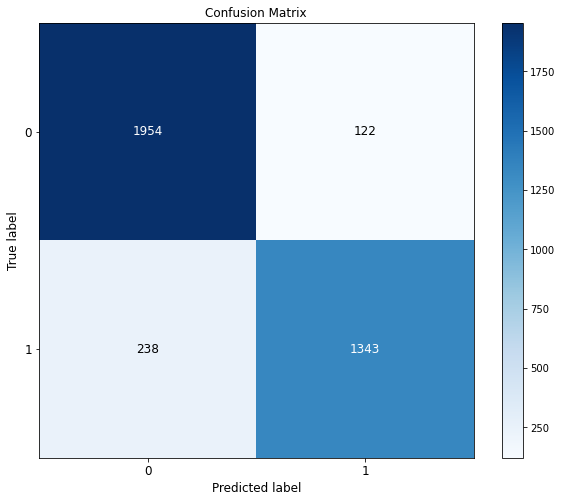

In [65]:
from sklearn import metrics
import scikitplot as splt
splt.metrics.plot_confusion_matrix(Y_test,y_predicted,figsize=(10,8),text_fontsize='large')